<a href="https://colab.research.google.com/github/HusnaRiyaz/ML-based-Toxicity-Prediction-of-drug-compounds/blob/main/Pubchem_FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install padelpy

     |████████████████████████████████| 20.9 MB 1.2 MB/s 


In [ ]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2021-11-17 18:48:44--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2021-11-17 18:48:45--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2021-11-17 18:48:45 (49.4 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprints_xm

In [ ]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [ ]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [ ]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("keggTox.smi", 
                  sep='\t', 
                  names=["Smiles", "ID", "Activity"])
df

,Smiles,ID,Activity
0,O=Cc1c(COP(=O)(O)O)cnc(c1O)C,D00006,0
1,OC(=O)C[C@@H](C(=O)O)N,D00013,0
2,SC[C@@H](C(=O)NCC(=O)O)NC(=O)CC[C@@H](C(=O)O)N,D00014,0
3,NC(=O)CC[C@@H](C(=O)O)N,D00015,0
4,OC[C@@H](C(=O)O)N,D00016,0
...,...,...,...
6711,CCCCO[C@H](OC[C@H](O)C)C,ZINC98359263,1
6712,O[N](=O)C1(CC=C(C=C1)c1ccccc1)[N](=O)O,ZINC98359292,1
6713,CCC1=C[C@@H](C(=S)C(=C1[N](=O)O)c1ccccc1)P(=O)...,ZINC98359314,1
6714,CCN(CCC(=C)C(=O)O)CC,ZINC98359322,1


In [ ]:
df.tail(2)

,Smiles,ID,Activity
6714,CCN(CCC(=C)C(=O)O)CC,ZINC98359322,1
6715,C1=CN=NN=NN=C1,ZINC98359352,1


In [ ]:
df2 = pd.concat( [df['Smiles'],df['ID']], axis=1 )
df2.to_csv('molecule.smi', sep='\t', index=False, header=False)
df2

,Smiles,ID
0,O=Cc1c(COP(=O)(O)O)cnc(c1O)C,D00006
1,OC(=O)C[C@@H](C(=O)O)N,D00013
2,SC[C@@H](C(=O)NCC(=O)O)NC(=O)CC[C@@H](C(=O)O)N,D00014
3,NC(=O)CC[C@@H](C(=O)O)N,D00015
4,OC[C@@H](C(=O)O)N,D00016
...,...,...
6711,CCCCO[C@H](OC[C@H](O)C)C,ZINC98359263
6712,O[N](=O)C1(CC=C(C=C1)c1ccccc1)[N](=O)O,ZINC98359292
6713,CCC1=C[C@@H](C(=S)C(=C1[N](=O)O)c1ccccc1)P(=O)...,ZINC98359314
6714,CCN(CCC(=C)C(=O)O)CC,ZINC98359322


In [ ]:
from padelpy import padeldescriptor

fingerprint = 'PubChem'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,D00013,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,D00006,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,D00015,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,D00014,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,D00016,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,ZINC98355837,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6712,ZINC98359292,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6713,ZINC98359322,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6714,ZINC98359352,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = descriptors.drop('Name', axis=1)
y = df['Activity']

In [ ]:
print(X.shape, y.shape)

(6716, 881) (6716,)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP1,PubchemFP2,PubchemFP11,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP37,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP185,PubchemFP186,PubchemFP192,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP259,PubchemFP285,PubchemFP286,PubchemFP293,PubchemFP294,PubchemFP299,PubchemFP308,PubchemFP333,PubchemFP335,PubchemFP338,PubchemFP339,PubchemFP340,PubchemFP341,PubchemFP342,PubchemFP345,...,PubchemFP656,PubchemFP657,PubchemFP659,PubchemFP660,PubchemFP662,PubchemFP664,PubchemFP665,PubchemFP666,PubchemFP667,PubchemFP668,PubchemFP671,PubchemFP672,PubchemFP674,PubchemFP677,PubchemFP678,PubchemFP679,PubchemFP680,PubchemFP682,PubchemFP683,PubchemFP684,PubchemFP688,PubchemFP689,PubchemFP691,PubchemFP692,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP704,PubchemFP708,PubchemFP709,PubchemFP710,PubchemFP712,PubchemFP714,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821
0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,1,...,1,1,1,1,0,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0
6712,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
6713,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6714,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#X_train, X_test, y_train, y_test = train_test_split(X_train, y_test, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((5372, 239), (1344, 239))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef

model = RandomForestClassifier(max_depth=70, min_samples_leaf=3, min_samples_split=19, n_estimators=500, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, min_samples_leaf=3, min_samples_split=19,
                       n_estimators=500, random_state=42)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
print (f'Train Accuracy - : {model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.794
Test Accuracy - : 0.713


In [ ]:
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_train

0.583318827671752

In [ ]:
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_test

0.41565545794476

In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
cv_scores

array([0.67, 0.66, 0.66, 0.66, 0.64])

In [ ]:
mcc_cv = cv_scores.mean()
mcc_cv

0.6597143408836557

In [ ]:
model_name = pd.Series(['Random forest'], name='Name')
mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name, mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)
performance_metrics

,Name,MCC_train,MCC_cv,MCC_test
0,Random forest,0.583319,0.659714,0.415655


In [ ]:
# Import needed packages
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       773
           1       0.65      0.59      0.62       571

    accuracy                           0.69      1344
   macro avg       0.68      0.68      0.68      1344
weighted avg       0.69      0.69      0.69      1344



In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[594, 179],
       [236, 335]])

0.710541989279333


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion_Matrix
[[736 189]
 [297 457]]


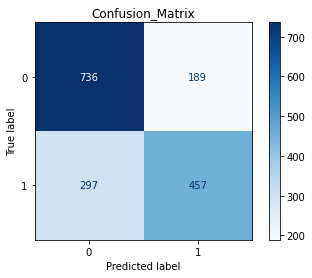

In [ ]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)
result = classifier.predict(X_test)
Score = metrics.accuracy_score(y_test, result)
print(Score)

np.set_printoptions(precision=2)

disp = plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
title = "Confusion_Matrix"
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       925
           1       0.71      0.61      0.65       754

    accuracy                           0.71      1679
   macro avg       0.71      0.70      0.70      1679
weighted avg       0.71      0.71      0.71      1679



In [ ]:
mcc_test = matthews_corrcoef(y_test, result)
mcc_test

0.4107472077916384

In [ ]:
from sklearn.model_selection import cross_val_score
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
cv_scores

array([0.72, 0.73, 0.7 , 0.69, 0.7 ])

In [ ]:
mcc_cv = cv_scores.mean()
mcc_cv

0.7079536498478902

In [ ]:
model_name = pd.Series(['SVM'], name='Name')
mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name, mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)
performance_metrics

,Name,MCC_train,MCC_cv,MCC_test
0,SVM,0.58873,0.707954,0.410747
